In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sp

pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)
sns.set_theme(context="paper", font_scale=1.5, style="ticks", rc={"axes.grid": True})

## Feature importance for all models

In [2]:
# Read Data (NEW from PP)
df = pd.read_csv("./data/features_and_response.noscale.csv", index_col=0)

# Drop NaNs
df.dropna(inplace=True)

# Collect Features and Labels
features_df = pd.DataFrame()
conf = df.drop(labels=["response", "occ_total_sum", "oldest_phylostratum"], axis=1)

features_df["occ_total_sum"] = df["occ_total_sum"]
features_df["oldest_phylostratum"] = df["oldest_phylostratum"]
features_df = pd.concat([features_df, conf], axis=1)

X = features_df.to_numpy()
y = df["response"].to_numpy()

features_df.head()

,occ_total_sum,oldest_phylostratum,cds_length,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AAA_freq,AAC_freq,AAG_freq,AAT_freq,ACA_freq,ACC_freq,ACG_freq,ACT_freq,AGA_freq,AGC_freq,AGG_freq,AGT_freq,ATA_freq,ATC_freq,ATG_freq,ATT_freq,CAA_freq,CAC_freq,CAG_freq,CAT_freq,CCA_freq,CCC_freq,CCG_freq,CCT_freq,CGA_freq,CGC_freq,CGG_freq,CGT_freq,CTA_freq,CTC_freq,CTG_freq,CTT_freq,GAA_freq,GAC_freq,GAG_freq,GAT_freq,GCA_freq,GCC_freq,GCG_freq,GCT_freq,GGA_freq,GGC_freq,GGG_freq,GGT_freq,GTA_freq,GTC_freq,GTG_freq,GTT_freq,TAA_freq,TAC_freq,TAG_freq,TAT_freq,TCA_freq,TCC_freq,TCG_freq,TCT_freq,TGA_freq,TGC_freq,TGG_freq,TGT_freq,TTA_freq,TTC_freq,TTG_freq
1,33,12,1488,0.612230,0.758065,0.561429,1.000000,0.216855,0.661290,1.000000,0.198925,0.0,0.041809,0.809254,0.706453,6.798234,0.040516,0.0,0.000000,0.004755,0.008152,0.007473,0.002717,0.011549,0.026495,0.010870,0.008152,0.010190,0.028533,0.019701,0.009511,0.000679,0.006114,0.010870,0.002038,0.009511,0.019022,0.028533,0.007473,0.027174,0.031250,0.025136,0.029891,0.015625,0.027174,0.019701,0.009511,0.007473,0.017663,0.044837,0.013587,0.008832,0.021739,0.031250,0.008152,0.016984,0.033967,0.027853,0.034647,0.023777,0.030571,0.029212,0.013587,0.000679,0.012908,0.027174,0.003397,0.000000,0.008152,0.000000,0.001359,0.008832,0.021739,0.009511,0.010190,0.020380,0.027174,0.029212,0.010870,0.000679,0.013587,0.005435
10,28,1,873,0.086769,0.195876,0.657839,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-0.007148,0.828752,1.097018,0.061963,0.002809,0.0,2.043350,0.025258,0.019518,0.021814,0.024110,0.025258,0.018370,0.003444,0.012629,0.035591,0.009185,0.016073,0.006889,0.016073,0.017222,0.010333,0.033295,0.019518,0.011481,0.020666,0.022962,0.017222,0.008037,0.002296,0.021814,0.003444,0.001148,0.004592,0.002296,0.008037,0.019518,0.022962,0.019518,0.033295,0.013777,0.019518,0.011481,0.014925,0.006889,0.000000,0.012629,0.018370,0.011481,0.017222,0.018370,0.005741,0.008037,0.012629,0.012629,0.012629,0.014925,0.006889,0.017222,0.017222,0.016073,0.005741,0.022962,0.020666,0.012629,0.027555,0.011481,0.021814,0.017222,0.026406
100,36,1,1092,0.479295,0.611722,0.851369,0.354628,0.618954,0.754579,0.030220,0.086996,0.0,0.040463,1.249600,1.354306,6.081620,0.028404,0.0,0.868383,0.018727,0.012172,0.023408,0.003745,0.017790,0.024345,0.007491,0.014981,0.024345,0.020599,0.025281,0.011236,0.003745,0.013109,0.019663,0.004682,0.017790,0.016854,0.029963,0.017790,0.034644,0.022472,0.010300,0.028090,0.005618,0.010300,0.014045,0.003745,0.015918,0.015918,0.033708,0.011236,0.014981,0.022472,0.026217,0.009363,0.015918,0.031835,0.007491,0.025281,0.028090,0.029026,0.021536,0.013109,0.008427,0.010300,0.016854,0.003745,0.006554,0.012172,0.005618,0.008427,0.014981,0.016854,0.009363,0.008427,0.014981,0.019663,0.029026,0.010300,0.004682,0.010300,0.004682
1000,126,1,2800,0.171524,0.280357,0.554023,0.052420,0.278492,0.270357,0.021429,0.151429,0.0,-0.022495,0.921420,1.382249,2.254471,0.014520,0.0,1.143060,0.022054,0.014823,0.022415,0.024946,0.022054,0.014100,0.006146,0.015546,0.024946,0.016992,0.012292,0.015907,0.013377,0.021330,0.026392,0.017715,0.026392,0.011931,0.027477,0.017354,0.023861,0.016992,0.006508,0.019161,0.005785,0.003977,0.007954,0.003977,0.006146,0.010846,0.025307,0.015907,0.022415,0.022777,0.016269,0.018800,0.015184,0.016992,0.004700,0.014461,0.017354,0.010484,0.010123,0.011931,0.009400,0.007231,0.020607,0.011931,0.013738,0.008315,0.006146,0.016631,0.022054,0.018077,0.004700,0.009038,0.031092,0.019523,0.019523,0.016992,0.016269,0.014100,0.015907
10000,55,1,1484,0.143843,0.030997,0.400789,0.106455,0.457949,0.708221,0.030997,0.659704,0.0,-0.000387,0.960747,1.196871,1.080241,0.009545,0.0,4.217000,0.039835,0.015797,0.030220,0.025412,0.024038,0.012363,0.002747,0.019918,0.048077,0.006868,0.015797,0.009615,0.020604,0.009615,0.032280,0.023352,0.019918,0.012363,0.021978,0.015797,0.

### Custom Scoring: Area Under Precision Recall Curve

In [4]:
from sklearn.metrics import auc, make_scorer, precision_recall_curve

def auprc(y_true, y_scores, **kwargs):
    """ Remember to use make_scorer(auprc, needs_proba=True,) when feeding to SKL's GSCV."""
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    # results is area under x=Recall and y=Precision curve. 
    return auc(recalls, precisions)

## Permutation Importance: Average Loss In AUROC After Feature Shuffling

In [5]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

def calc_importances(model, x, y, ranseed=None):
    
    # Train/test split
    x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=ranseed)

    # Train the model on the dataset
    model.fit(x_tr, y_tr) 
    
    # Compare the model against other models trained on permutations of the dataset
    results = permutation_importance(model, x_te, y_te, n_repeats=10, random_state=ranseed, scoring='roc_auc', n_jobs=-1)
    
    return (features_df.columns.to_list(), results.importances_mean, results.importances_std)

### SVC

In [6]:
X = np.ascontiguousarray(X)
y = np.ascontiguousarray(y)

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Confounder PCA as ColumnTransformer
confpca = ColumnTransformer(
    [("ots+of", "passthrough", [0, 1]), 
     ("conf", PCA(n_components=None), slice(2, X.shape[1]))]
)


# Model as Pipeline
svm_clf = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", confpca),
        ("svm", SVC(kernel="rbf", cache_size=4000, probability=True, C=1, class_weight="balanced", gamma=0.001)), 
    ]
)

x_data, y_data, err_data = calc_importances(svm_clf, X, y, ranseed=15) 

In [8]:
svm_df = pd.DataFrame(zip(y_data, err_data), columns=["Score", "StDev"], index=x_data)
svm_df.head()

,Score,StDev
occ_total_sum,0.032157,0.002855
oldest_phylostratum,0.012390,0.003551
cds_length,0.013532,0.002023
dnase_gene,0.001038,0.000742
dnase_cds,0.000306,0.000282


In [9]:
svm_df.to_csv("./results/svm_fi.csv")

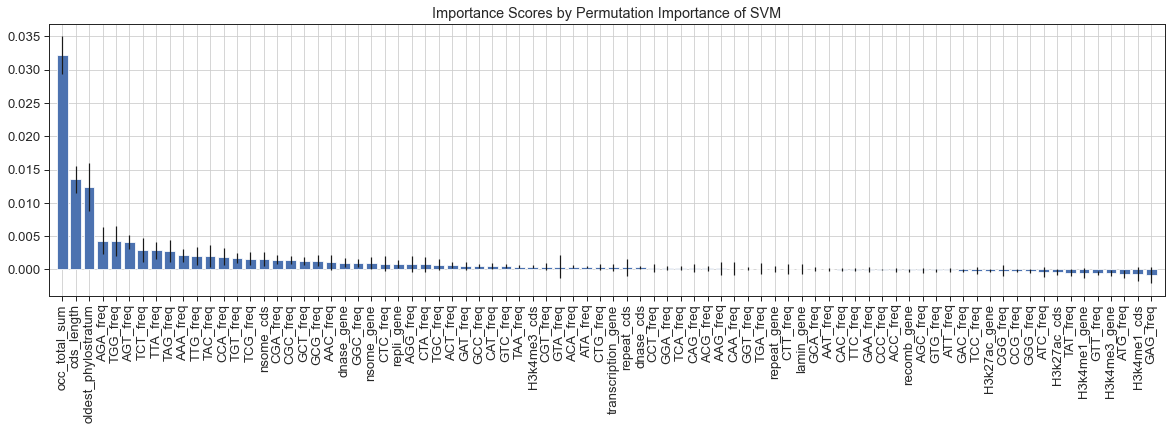

In [10]:
plt.figure(figsize=(20,5))

x_data = svm_df.sort_values(by="Score", ascending=False).index.tolist()
y_data = svm_df.sort_values(by="Score", ascending=False)["Score"].tolist()
err_data = svm_df.sort_values(by="Score", ascending=False)["StDev"].tolist()

plt.bar(x=x_data, height=y_data, yerr=err_data)

plt.xticks(rotation=90)
plt.title("Importance Scores by Permutation Importance of SVM")
# plt.ylabel("Total Gini Criterion Reduction")
plt.xlim(-1,82)
plt.savefig("./figures/svm_fi.png", dpi=100, bbox_inches="tight")
plt.show()

### HGB

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


# Define the model to be tuned
hgb_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("gb", HistGradientBoostingClassifier(
        early_stopping=True, scoring="roc_auc", n_iter_no_change=10, tol=1e-5,
        learning_rate=0.1, max_depth=5, max_iter=500, min_samples_leaf=10
    )),
])

x_data, y_data, err_data = calc_importances(hgb_clf, X, y, ranseed=15) 

In [12]:
hgb_df = pd.DataFrame(zip(y_data, err_data), columns=["Score", "StDev"], index=x_data)
hgb_df.to_csv("./results/hgb_fi.csv")

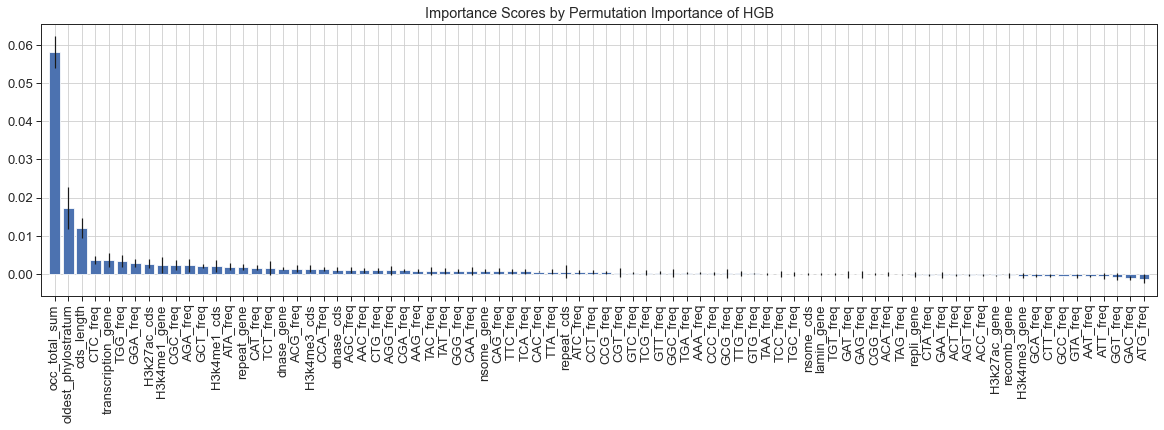

In [13]:
plt.figure(figsize=(20,5))

x_data = hgb_df.sort_values(by="Score", ascending=False).index.tolist()
y_data = hgb_df.sort_values(by="Score", ascending=False)["Score"].tolist()
err_data = hgb_df.sort_values(by="Score", ascending=False)["StDev"].tolist()

plt.bar(x=x_data, height=y_data, yerr=err_data)

plt.xticks(rotation=90)
plt.title("Importance Scores by Permutation Importance of HGB")
# plt.ylabel("Total Gini Criterion Reduction")
plt.xlim(-1,82)
plt.savefig("./figures/hgb_fi.png", dpi=100, bbox_inches="tight")
plt.show()

### LR

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Confounder PCA as ColumnTransformer()
confpca = ColumnTransformer([
    ("ots+of", "passthrough", [0, 1]), 
    ("conf", PCA(n_components=None), slice(2, X.shape[1]))
])

# Model as Pipeline
lr_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", confpca),
    ("lr", LogisticRegression(max_iter=2000, class_weight="balanced")),
])

x_data, y_data, err_data = calc_importances(lr_clf, X, y, ranseed=15) 

In [26]:
lr_df = pd.DataFrame(zip(y_data, err_data), columns=["Score", "StDev"], index=x_data)
lr_df.to_csv("./results/lr_fi.csv")

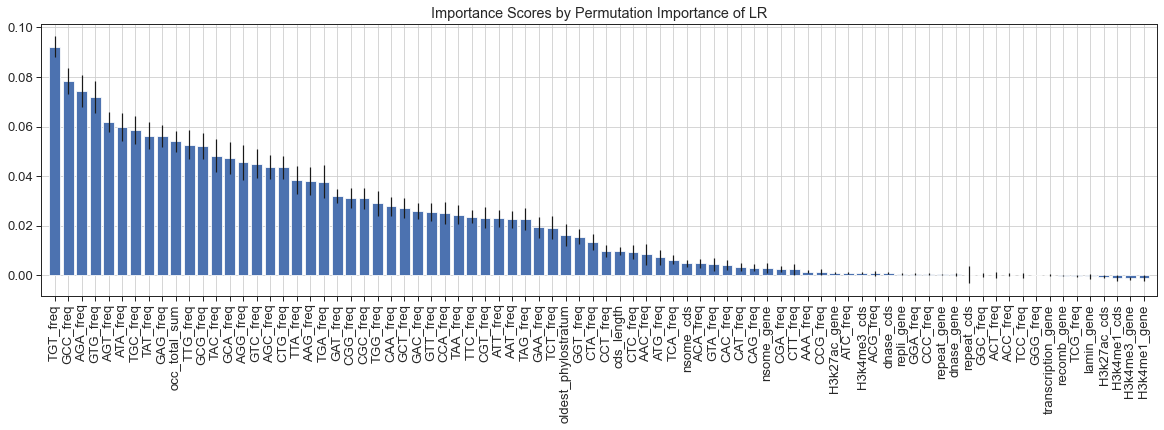

In [27]:
plt.figure(figsize=(20,5))

x_data = lr_df.sort_values(by="Score", ascending=False).index.tolist()
y_data = lr_df.sort_values(by="Score", ascending=False)["Score"].tolist()
err_data = lr_df.sort_values(by="Score", ascending=False)["StDev"].tolist()

plt.bar(x=x_data, height=y_data, yerr=err_data)

plt.xticks(rotation=90)
plt.title("Importance Scores by Permutation Importance of LR")
# plt.ylabel("Total Gini Criterion Reduction")
plt.xlim(-1,82)
plt.savefig("./figures/lr_fi.png", dpi=100, bbox_inches="tight")
plt.show()

### GNB

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from  sklearn.naive_bayes import GaussianNB

# Confounder PCA as ColumnTransformer()
confpca = ColumnTransformer([
    ("ots+of", "passthrough", [0, 1]), 
    ("conf", PCA(n_components=None), slice(2, X.shape[1]))
])

# Model as Pipeline
gnb_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", confpca),
    ("gnb", GaussianNB()),
])

x_data, y_data, err_data = calc_importances(gnb_clf, X, y, ranseed=4) 

In [47]:
gnb_df = pd.DataFrame(zip(y_data, err_data), columns=["Score", "StDev"], index=x_data)
gnb_df.to_csv("./results/gnb_fi.csv")

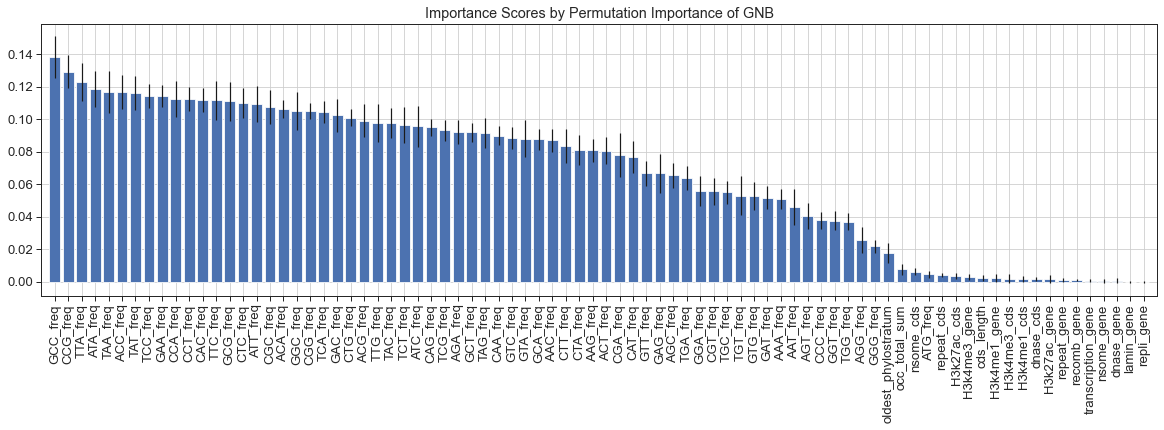

In [48]:
plt.figure(figsize=(20,5))

x_data = gnb_df.sort_values(by="Score", ascending=False).index.tolist()
y_data = gnb_df.sort_values(by="Score", ascending=False)["Score"].tolist()
err_data = gnb_df.sort_values(by="Score", ascending=False)["StDev"].tolist()

plt.bar(x=x_data, height=y_data, yerr=err_data)

plt.xticks(rotation=90)
plt.title("Importance Scores by Permutation Importance of GNB")
# plt.ylabel("Total Gini Criterion Reduction")
plt.xlim(-1,82)
plt.savefig("./figures/gnb_fi.png", dpi=100, bbox_inches="tight")
plt.show()

### ADABOOST

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Define the model to be tuned
adab_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("gb", AdaBoostClassifier(learning_rate=0.5, n_estimators=200)),
])

x_data, y_data, err_data = calc_importances(adab_clf, X, y, ranseed=4) 

In [44]:
adab_df = pd.DataFrame(zip(y_data, err_data), columns=["Score", "StDev"], index=x_data)
adab_df.to_csv("./results/adab_fi.csv")

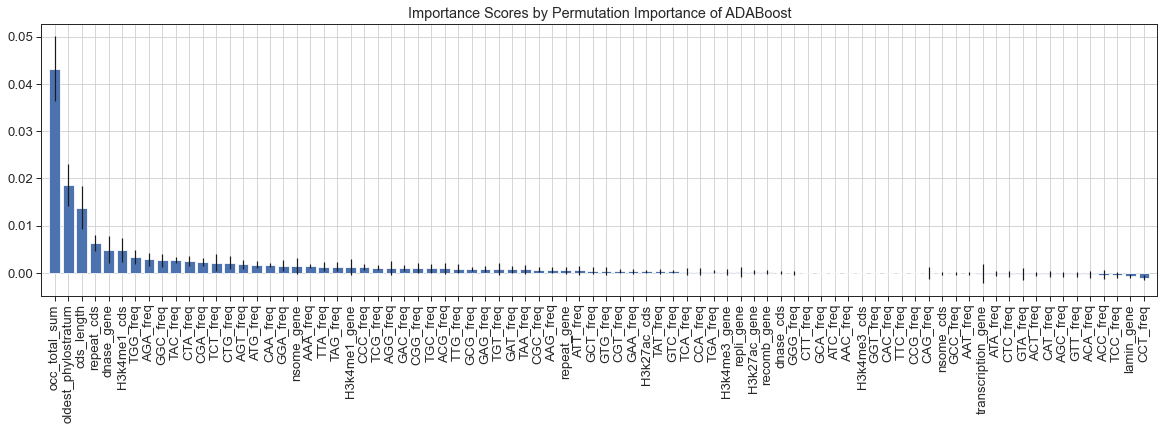

In [45]:
plt.figure(figsize=(20,5))

x_data = adab_df.sort_values(by="Score", ascending=False).index.tolist()
y_data = adab_df.sort_values(by="Score", ascending=False)["Score"].tolist()
err_data = adab_df.sort_values(by="Score", ascending=False)["StDev"].tolist()

plt.bar(x=x_data, height=y_data, yerr=err_data)

plt.xticks(rotation=90)
plt.title("Importance Scores by Permutation Importance of ADABoost")
# plt.ylabel("Total Gini Criterion Reduction")
plt.xlim(-1,82)
plt.savefig("./figures/adab_fi.png", dpi=100, bbox_inches="tight")
plt.show()

## Producing a table

In [92]:
lr_df = pd.read_csv("./results/lr_fi.csv", index_col=0)
rf_df = pd.read_csv("./results/rf_imp_permutation.csv", index_col=0)
svc_df = pd.read_csv("./results/svm_fi.csv", index_col=0)
gnb_df = pd.read_csv("./results/gnb_fi.csv", index_col=0)
hgb_df = pd.read_csv("./results/hgb_fi.csv", index_col=0)
adab_df = pd.read_csv("./results/adab_fi.csv", index_col=0)

In [93]:
results = [lr_df, rf_df, svc_df, hgb_df, adab_df, gnb_df]

indices = []
for df in results:
    indices += df.sort_values(by="Score",ascending=False)[:10].index.to_list()
    
indices = list(set(indices))
len(indices)

34

In [94]:
lr_df.loc[indices].sort_index()

table = pd.DataFrame([])
for df in results:
    table = pd.concat([table, df.loc[indices].sort_index()], axis=1)

In [108]:
col_names = ["LR", "LRSD", "RF", "RFSD", "SVM", "SVMSD", "HGB", "HGBSD", "ADAB", "ADABSD", "GNB", "GNBSD"]
table.columns = col_names

table.shape

(34, 12)

In [111]:
table.sort_values(by="LR", ascending=False)

,LR,LRSD,RF,RFSD,SVM,SVMSD,HGB,HGBSD,ADAB,ADABSD,GNB,GNBSD
TGT_freq,0.092192,0.004191,0.000245,0.000244,0.001699,0.000749,-0.000014,0.000182,0.000775,0.001325,0.053025,0.011900
GCC_freq,0.078457,0.005187,-0.000174,0.000141,0.000515,0.000278,-0.000538,0.000098,-0.000124,0.000296,0.138076,0.012949
AGA_freq,0.074226,0.006415,0.001662,0.000681,0.004333,0.001976,0.002269,0.001725,0.002859,0.001347,0.091980,0.007480
GTG_freq,0.071999,0.006408,0.000233,0.000347,-0.000148,0.000185,0.000148,0.000232,0.000376,0.000789,0.052845,0.008641
AGT_freq,0.061734,0.004073,0.000607,0.000234,0.004174,0.001039,-0.000286,0.000237,0.001780,0.001002,0.040342,0.008024
ATA_freq,0.059680,0.005595,0.000510,0.000147,0.000374,0.000217,0.001947,0.001019,-0.000221,0.000537,0.118667,0.011238
TGC_freq,0.058510,0.005651,0.000703,0.000312,0.000741,0.000866,0.000050,0.000539,0.001006,0.000952,0.054926,0.007169
TAT_freq,0.056370,0.005586,0.000175,0.000188,-0.000481,0.000504,0.000818,0.000741,0.000288,0.000511,0.116238,0.010651
GAG_freq,0.056082,0.004452,0.000606,0.000604,-0.000849,0.001246,-0.000042,0.000955,0.000796,0.000644,0.066635,0.011885
occ_total_sum,0.054061,0.004261,0.020220,0.004102,0.032157,0.002855,0.058140,0.004127,0.043246,0.006835,0.007512,0.003147


In [112]:
table.to_csv("./results/top_features.csv")